In [1]:
import time

import matplotlib.pyplot as plt
import skeliner as sk



In [2]:
def plot_skeleton(skel, mesh, name):
    # --- 0. one global bounding-box ----------------------------------------
    v = mesh.vertices * 1e-3                      # nm → µm once
    gx = (v[:, 0].min(), v[:, 0].max())   # x (for XZ)
    gy = (v[:, 1].min(), v[:, 1].max())   # y (for XY, YZ)
    gz = (v[:, 2].min(), v[:, 2].max())   # z (for YZ, XZ)


    # --- 1. build the 2×2 mosaic ------------------------------------------

    mosaic = """
    B.
    AC
    """
    fig, ax = plt.subplot_mosaic(
        mosaic,
        figsize=(8, 8),
        gridspec_kw={
            "height_ratios": [gx[1]-gx[0], gz[1]-gz[0]],   # row-heights in µm
            "width_ratios":  [gy[1]-gy[0], gx[1]-gx[0]],   # col-widths  in µm
        },
    )

    # make every panel square in data-pixel space
    sk.plot2d(skel, mesh, plane="yx", scale=1e-3,
            ax=ax["B"], xlim=gy, ylim=gx,
            draw_edges=True, draw_soma_mask=True)
    ax["B"].set_aspect("equal")           # <── let XY stretch

    sk.plot2d(skel, mesh, plane="yz", scale=1e-3,
            ax=ax["A"], xlim=gy, ylim=gz,
            draw_edges=True, draw_soma_mask=True)
    ax["A"].set_aspect("equal")           # <── full Δy × Δz rectangle

    sk.plot2d(skel, mesh, plane="xz", scale=1e-3,
            ax=ax["C"], xlim=gx, ylim=gz,
            draw_edges=True, draw_soma_mask=True)
    ax["C"].set_aspect("equal")           # <── full Δx × Δz rectangle

    fig.suptitle(f"Eyewire {name}", fontsize=16)

In [3]:
# EyeWire I dataset in .ctm format can be found at: 
# https://drive.google.com/file/d/1-qmE1sEL3AIGpNfi0w50MEOgm2WIF4_1/view?usp=sharing
mesh_path = "../data/eyewire/10005.ctm"
mesh = sk.io.load_mesh(mesh_path)

In [ ]:
start = time.time()
skel_pre_auto = sk.skeletonize(mesh, 
    detect_soma="pre", # pre-skeletonization soma detection
    soma_seed_radius_multipler=30,
    soma_density_cutoff=0.3,
    soma_dilation_steps=1,
    collapse_soma=True, # default
    bridge_components=True, # default
    prune_tiny_neurites=True, # default
    verbose=True,
)

[skeliner] starting skeletonisation
 ↳  build surface graph                          … 1.6 s
 ↳  detect soma                                  … 1.1 s
 ↳  partition surface into geodesic shells       … 0.7 s
 ↳  place centroids + local radius               … 2.6 s
 ↳  map mesh edges → skeleton edges              … 0.3 s
 ↳  merge redundant near-soma nodes              … 0.0 s
 ↳  reconnect mesh gaps                          … 0.3 s
 ↳  build global minimum-spanning tree           … 0.1 s
 ↳  prune tiny soma-attached branches            … 0.0 s
TOTAL (soma + core + post)                       … 6.8 s (2.6 + 3.7 + 0.4)


In [ ]:
start = time.time()
skel_post_auto = sk.skeletonize(mesh, 
    detect_soma="post", # post skeletonization soma detection
    collapse_soma=True, # default
    bridge_components=True, # default
    prune_tiny_neurites=True, # default
    verbose=True,
)


[skeliner] starting skeletonisation
 ↳  build surface graph                          … 1.1 s
 ↳  partition surface into geodesic shells       … 0.6 s
 ↳  place centroids + local radius               … 2.6 s
 ↳  map mesh edges → skeleton edges              … 0.3 s
 ↳  merge redundant near-soma nodes              … 0.0 s
 ↳  reconnect mesh gaps                          … 0.4 s
 ↳  build global minimum-spanning tree           … 0.1 s
 ↳  prune tiny soma-attached branches            … 0.1 s
TOTAL (soma + core + post)                       … 5.2 s (0.0 + 4.7 + 0.5)


In [6]:
start = time.time()
skel_seed = sk.skeletonize(mesh, 
    detect_soma="seed", # seed-based soma detection (manual)
    soma_seed_point=skel_post.nodes[0],
    soma_seed_radius=skel_post.r[0] * 1.1,
    collapse_soma=True, # default
    bridge_components=True, # default
    prune_tiny_neurites=True, # default
    verbose=True,
)

[skeliner] starting skeletonisation
 ↳  build surface graph                          … 1.0 s
 ↳  detect soma                                  … 0.3 s
 ↳  partition surface into geodesic shells       … 0.7 s
 ↳  place centroids + local radius               … 2.6 s
 ↳  map mesh edges → skeleton edges              … 0.3 s
 ↳  merge redundant near-soma nodes              … 0.0 s
 ↳  reconnect mesh gaps                          … 0.3 s
 ↳  build global minimum-spanning tree           … 0.1 s
 ↳  prune tiny soma-attached branches            … 0.0 s
TOTAL (soma + core + post)                       … 5.4 s (1.3 + 3.7 + 0.4)


In [ ]:
start = time.time()
skel_pre_semiauto = sk.skeletonize(mesh, 
    detect_soma="pre", 
    soma_seed_point=skel_post.nodes[0],
    soma_seed_radius=skel_post.r[0],
    soma_seed_radius_multipler=30,
    soma_density_cutoff=0.2,
    soma_dilation_steps=0,
    collapse_soma=True, # default
    bridge_components=True, # default
    prune_tiny_neurites=True, # default
    verbose=True,
)

[skeliner] starting skeletonisation
 ↳  build surface graph                          … 1.2 s
 ↳  detect soma                                  … 2.5 s
 ↳  partition surface into geodesic shells       … 0.7 s
 ↳  place centroids + local radius               … 2.5 s
 ↳  map mesh edges → skeleton edges              … 0.3 s
 ↳  merge redundant near-soma nodes              … 0.0 s
 ↳  reconnect mesh gaps                          … 0.4 s
 ↳  build global minimum-spanning tree           … 0.1 s
 ↳  prune tiny soma-attached branches            … 0.1 s
TOTAL (soma + core + post)                       … 7.6 s (3.6 + 3.5 + 0.4)


In [8]:
plot_skeleton(skel0, mesh, "Skeliner (full auto soma detection)")


NameError: name 'skel0' is not defined

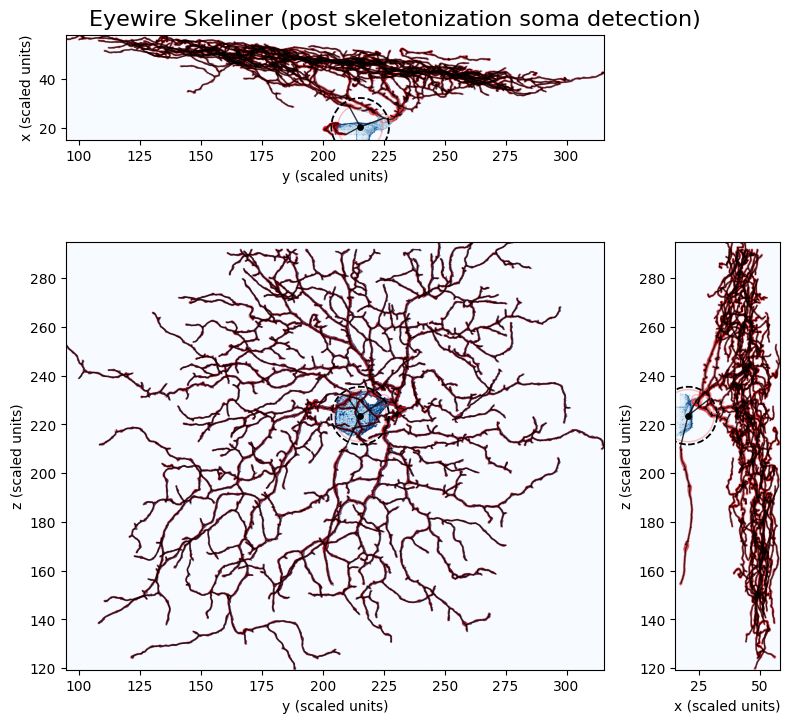

In [ ]:
plot_skeleton(skel1, mesh, "Skeliner (post skeletonization soma detection)")


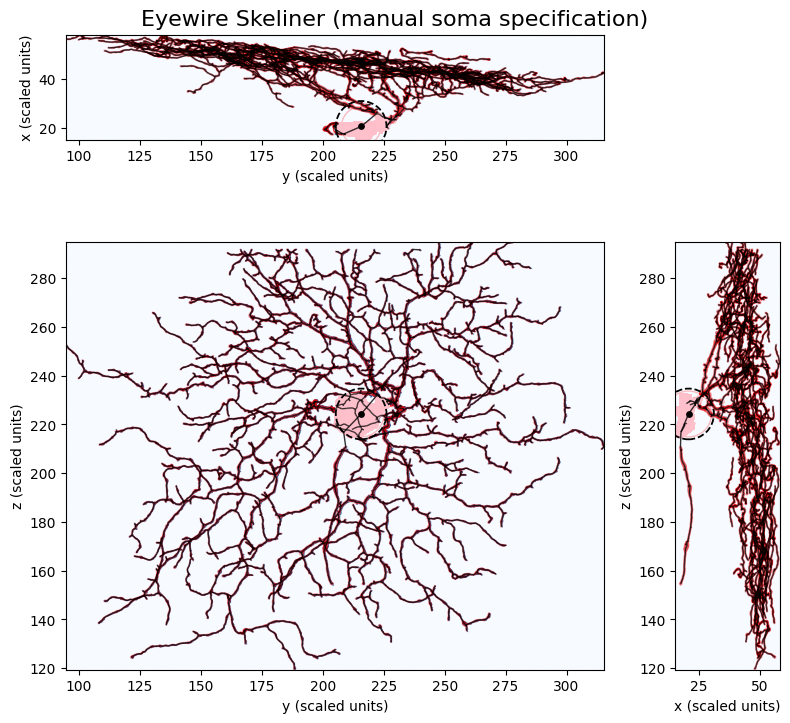

In [ ]:
plot_skeleton(skel2, mesh, "Skeliner (manual soma specification)")


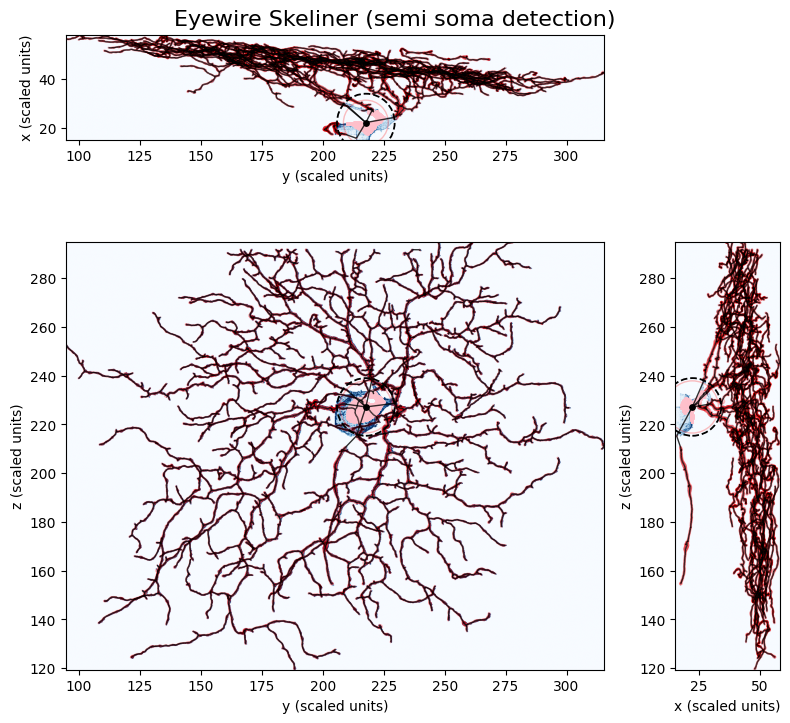

In [ ]:
plot_skeleton(skel3, mesh, "Skeliner (semi soma detection)")


In [ ]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-05-19 18:22:24CEST

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 9.2.0

numpy     : 2.0.2
skeliner  : 0.1.0
matplotlib: 3.10.3

Watermark: 2.5.0

